<a href="https://colab.research.google.com/github/FirmanFrezyPradana/MachineLearningBrainTumorKlasifikasi/blob/main/CodingBrainTumur2118112FirmanFrezyPradana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import library pyton**

In [ ]:
#import library
from natsort import natsorted
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'

import matplotlib.image as mpimg
import random
from skimage.io import imread
import cv2
import xgboost
from PIL.Image import open

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

# **2. meload dataset dari gdrivet**

In [ ]:
#Load dataset
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tumor/Brain Tumor.csv")

Mounted at /content/drive


# **3. Melihat data yang ada di dataset .csv**

In [ ]:
#mencetak lima baris pertama dari DataFrame df, tetapi hanya kolom-kolom dari indeks 0 hingga 6 (kolom pertama hingga kolom ketujuh),
#menggunakan metode iloc yang digunakan untuk indexing berdasarkan posisi.
print((df.iloc[:,0:7].head()).to_string())
#kita memilih kolom dari indeks ke-8 hingga ke-14 (kolom ke-9 hingga ke-15) dari DataFrame df.
print((df.iloc[:,8:15].head()).to_string())

    Image  Class      Mean     Variance  Standard Deviation   Entropy  Skewness
0  Image1      0  6.535339   619.587845           24.891522  0.109059  4.276477
1  Image2      0  8.749969   805.957634           28.389393  0.266538  3.718116
2  Image3      1  7.341095  1143.808219           33.820234  0.001467  5.061750
3  Image4      1  5.958145   959.711985           30.979219  0.001477  5.677977
4  Image5      0  7.315231   729.540579           27.010009  0.146761  4.283221
     Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation     Coarseness
0   98.613971  0.293314  0.086033     0.530941       4.473346     0.981939  7.458341e-155
1   63.858816  0.475051  0.225674     0.651352       3.220072     0.988834  7.458341e-155
2   81.867206  0.031917  0.001019     0.268275       5.981800     0.978014  7.458341e-155
3  151.229741  0.032024  0.001026     0.243851       7.700919     0.964189  7.458341e-155
4  174.988756  0.343849  0.118232     0.501140       6.834689     0.97

# **4. filter data dengan kondisi is null**

In [ ]:
#Periksa ada tidaknya nilai null pada dataset
print(df.isnull().sum())

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64


# **5. Membaca semua nilai yang memiliki nilai not-null beserta tyoe data**

In [ ]:
#Baca informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

# **6. Membaca statistik data dari image (1 - 3760) data statistik meilputi (count, mean, std, min, 25%, 50%, 75% ,max)**

In [ ]:
print(df.describe().to_string())

             Class         Mean     Variance  Standard Deviation      Entropy     Skewness     Kurtosis     Contrast       Energy          ASM  Homogeneity  Dissimilarity  Correlation     Coarseness
count  3762.000000  3762.000000  3762.000000         3762.000000  3762.000000  3762.000000  3762.000000  3762.000000  3762.000000  3762.000000  3762.000000    3762.000000  3762.000000   3.762000e+03
mean      0.447368     9.488890   711.101063           25.182271     0.073603     4.102727    24.389071   127.961459     0.204705     0.058632     0.479252       4.698498     0.955767  7.458341e-155
std       0.497288     5.728022   467.466896            8.773526     0.070269     2.560940    56.434747   109.499601     0.129352     0.058300     0.127929       1.850173     0.026157   0.000000e+00
min       0.000000     0.078659     3.145628            1.773592     0.000882     1.886014     3.942402     3.194733     0.024731     0.000612     0.105490       0.681121     0.549426  7.458341e-155
25%  

# **7. membuat skala dataset untuk dijadikan prediksi**

In [ ]:
#Skalakan dataset untuk meminimalisir error prediksi
scalable =['Mean', 'Variance', 'Standard Deviation', 'Entropy',\
           'Skewness', 'Kurtosis','Contrast', 'Energy', 'ASM',\
           'Homogeneity', 'Dissimilarity', 'Correlation',\
           'Coarseness']

df[scalable]=StandardScaler().fit_transform(df[scalable])

#Baca deskripsi statistik setelah dataset diskalakan
print((df.describe().iloc[:,0:5].head()).to_string())
print((df.describe().iloc[:,6:11].head()).to_string())
print((df.describe().iloc[:,12:15].head()).to_string())

             Class          Mean      Variance  Standard Deviation       Entropy
count  3762.000000  3.762000e+03  3.762000e+03        3.762000e+03  3.762000e+03
mean      0.447368  1.435440e-16 -1.284341e-16        2.946429e-16 -1.813187e-16
std       0.497288  1.000133e+00  1.000133e+00        1.000133e+00  1.000133e+00
min       0.000000 -1.643060e+00 -1.514652e+00       -2.668459e+00 -1.035037e+00
25%       0.000000 -7.868500e-01 -7.442706e-01       -6.980786e-01 -9.499968e-01
           Kurtosis      Contrast        Energy           ASM   Homogeneity
count  3.762000e+03  3.762000e+03  3.762000e+03  3.762000e+03  3.762000e+03
mean  -7.554947e-18  7.554947e-17 -9.065936e-17  3.021979e-17 -4.230770e-16
std    1.000133e+00  1.000133e+00  1.000133e+00  1.000133e+00  1.000133e+00
min   -3.623545e-01 -1.139578e+00 -1.391539e+00 -9.953228e-01 -2.922023e+00
25%   -3.036870e-01 -5.099897e-01 -1.044483e+00 -9.226728e-01 -8.934198e-01
        Correlation     Coarseness
count  3.762000e+03   3

# **8. Menampilkan jumalh citra yang masuk dalam kategori tumor dan sehat dari total 3762**


In [ ]:
#Tampilkan jumlah citra yang masuk kelas 1 (Tumor) dan kelas 0 (Sehat/No Tumor)
print('Number of Tumor samples:', df['Class'].value_counts()[1])
print('Tumor percentage:', round(df['Class'].value_counts()[1] / len(df) * 100, 2), '%')
print('Number of No Tumor Samples:', df['Class'].value_counts()[0])
print('No Tumor percentage:', round(df['Class'].value_counts()[0] / len(df) * 100, 2), '%')

Number of Tumor samples: 1683
Tumor percentage: 44.74 %
Number of No Tumor Samples: 2079
No Tumor percentage: 55.26 %


# **9**. Menghitung dan memplot distribusi target dengan menggunakna grafik batang

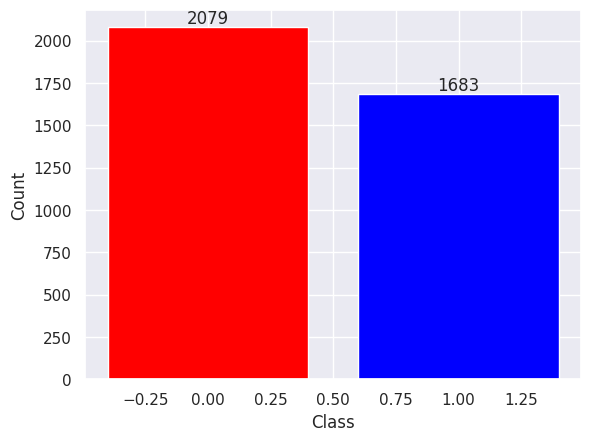

In [ ]:
# Hitung distribusi variabel target 'Class'
class_distribution = df['Class'].value_counts()

# Plot distribusi menggunakan grafik batang dengan warna merah dan biru
plt.bar(class_distribution.index, class_distribution.values, color=['red', 'blue'])

# Tambahkan label pada sumbu x dan y
plt.xlabel('Class')
plt.ylabel('Count')

# Tambahkan nilai-nilai di atas setiap batang
for i in range(len(class_distribution)):
    plt.text(i, class_distribution.values[i], str(class_distribution.values[i]), ha='center', va='bottom')

# Tampilkan plot
plt.show()

# **10. Menampilkan homogenitas berdasarkan kelas, dengan warna merah dan biru.**

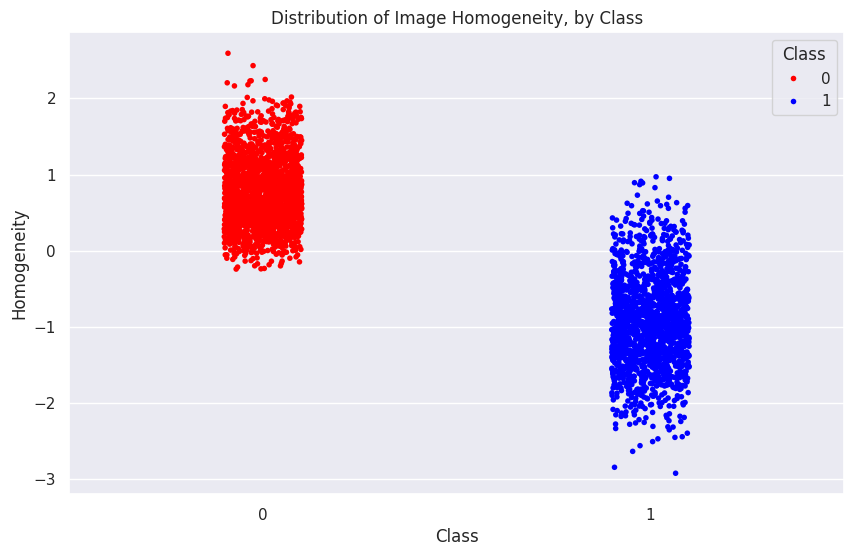

In [ ]:
# Definisikan palet warna untuk kelas 'Class'
palette_colors = {0: 'red', 1: 'blue'}

# Tampilkan fitur homogenity berdasarkan class dengan warna merah dan biru
plt.figure(figsize=(10, 6))
Y = df['Class']
X = df.drop(columns=['Image', 'Class'])

sns.stripplot(x=Y, y=df['Homogeneity'], hue=Y, palette=palette_colors, size=4)  # Atur ukuran marker menjadi 4
plt.title("Distribution of Image Homogeneity, by Class")
plt.xlabel("Class")
plt.ylabel("Homogeneity")

plt.show()

# **11. Menampilkan distribusi fitur Mean versus Entropy berdasarkan kelas dengan titik-titik.**

<Axes: xlabel='Mean', ylabel='Entropy'>

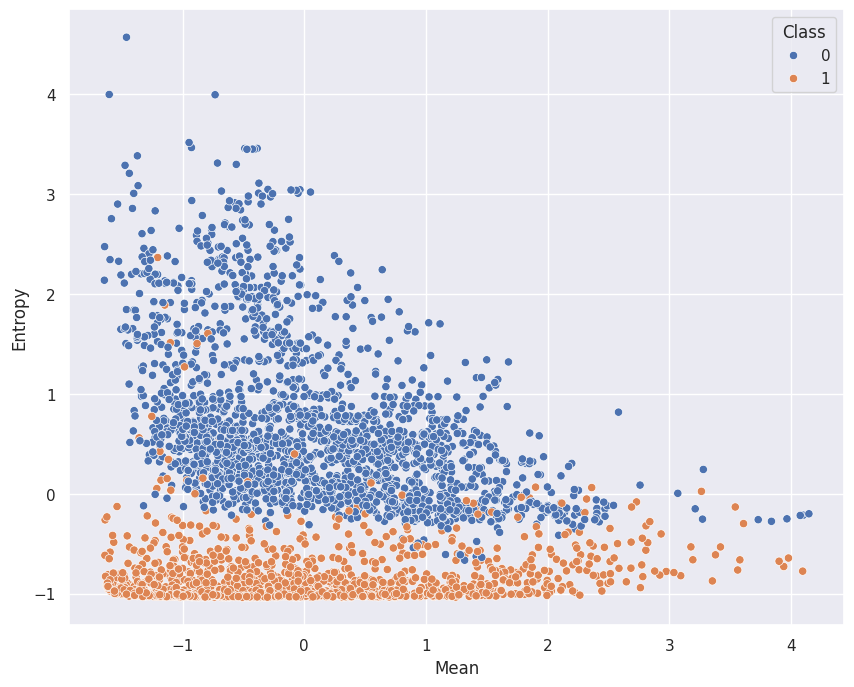

In [ ]:
#Tampilkan distribusi fitur Mean versus entropy versus Class
plt.figure(figsize=(10,8))
sns.scatterplot(x='Mean', y='Entropy', hue='Class', data=df)

# **12. menampilkan distribusi energy dan entropy berdasarkan kelas dengan menggunakan diagram batang**

<Figure size 640x480 with 0 Axes>

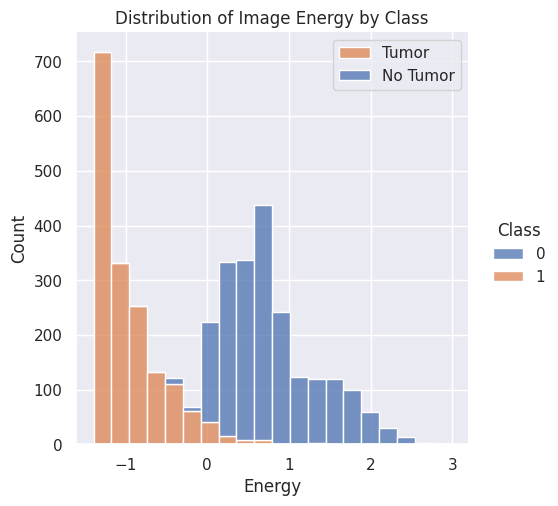

<Figure size 640x480 with 0 Axes>

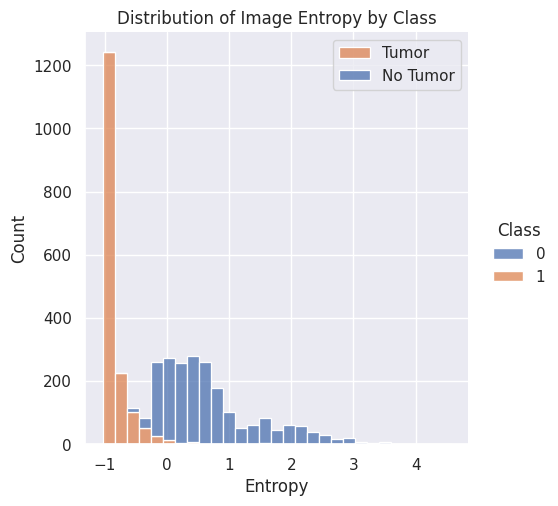

In [ ]:
#Tampilkan distribusi fitur Energy berdasarkan Class dan distribusi fitur Entropy berdasarkan Class
# Drop kolom 'Image' dari _data
_data = df.drop('Image', axis=1)

# Plot distribusi energi berdasarkan kelas
plt.figure()
sns.displot(data=_data, x='Energy', hue='Class', kind='hist', multiple='stack')
plt.title("Distribution of Image Energy by Class")
plt.legend(labels=["Tumor", "No Tumor"])

# Plot distribusi entropi berdasarkan kelas
plt.figure()
sns.displot(data=_data, x='Entropy', hue='Class', kind='hist', multiple='stack')
plt.title("Distribution of Image Entropy by Class")
plt.legend(labels=["Tumor", "No Tumor"])

plt.show()

# **13**. menampikan matrix korelasi antar fitur, ( Matriks korelasi adalah representasi dalam bentuk tabel, di mana baris dan kolom mewakili variabel dalam dataset, dan nilai di setiap sel menunjukkan koefisien korelasi antara dua variabel yang sesuai.)

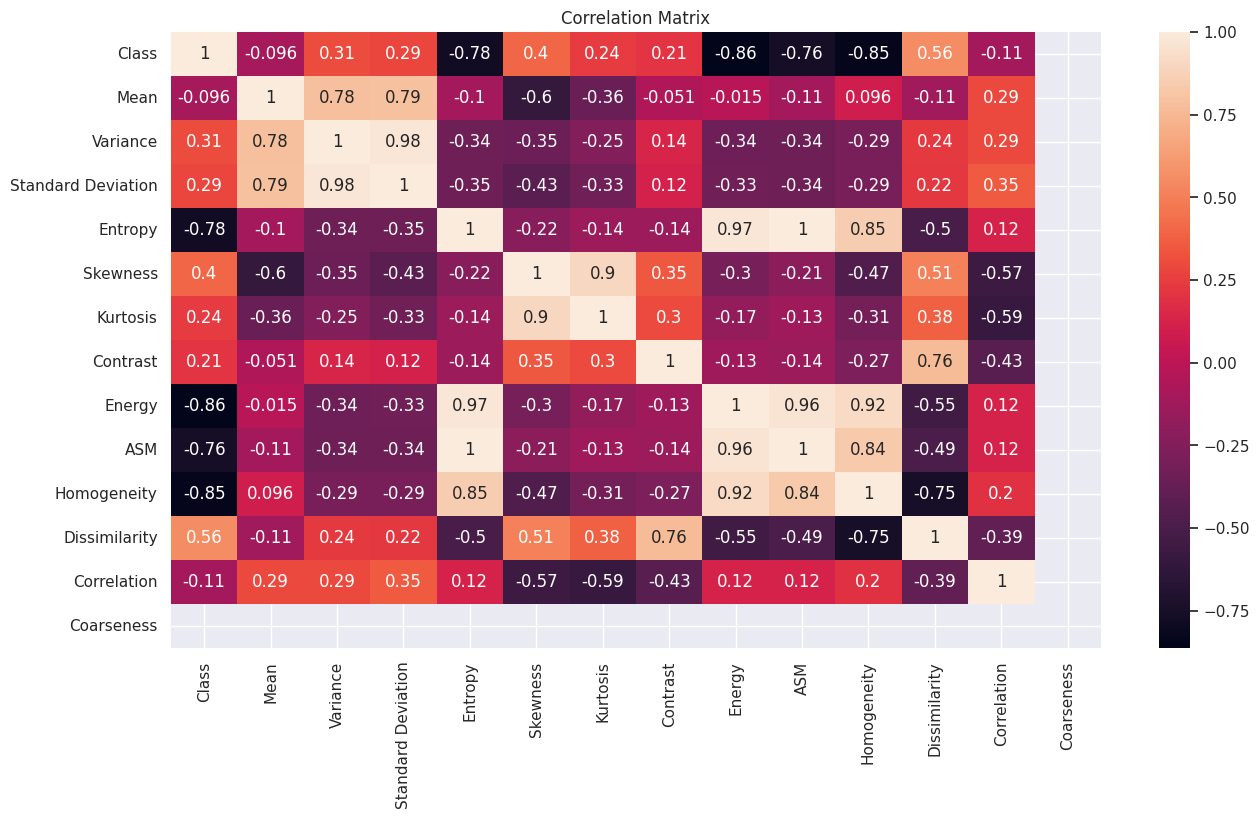

In [ ]:
# Tampilkan matriks korelasi
plt.figure(figsize=(15, 8))
corrdata = _data.corr()  # Menggunakan _data karena telah menghapus 'Image' dari DataFrame
sns.heatmap(corrdata, annot=True)
plt.title("Correlation Matrix")
plt.show()

# **14. Hitung korelasi tiap fitur dengan variabel target, kemudian tampilkan dalam bentuk tabel batang**

Mean                 -0.095729
Variance              0.308818
Standard Deviation    0.285568
Entropy              -0.778180
Skewness              0.402644
Kurtosis              0.239844
Contrast              0.212643
Energy               -0.862413
ASM                  -0.758255
Homogeneity          -0.847529
Dissimilarity         0.556319
Correlation          -0.108601
Coarseness            1.000000
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

divide by zero encountered in divide



<Axes: title={'center': 'Corellation with Class'}>

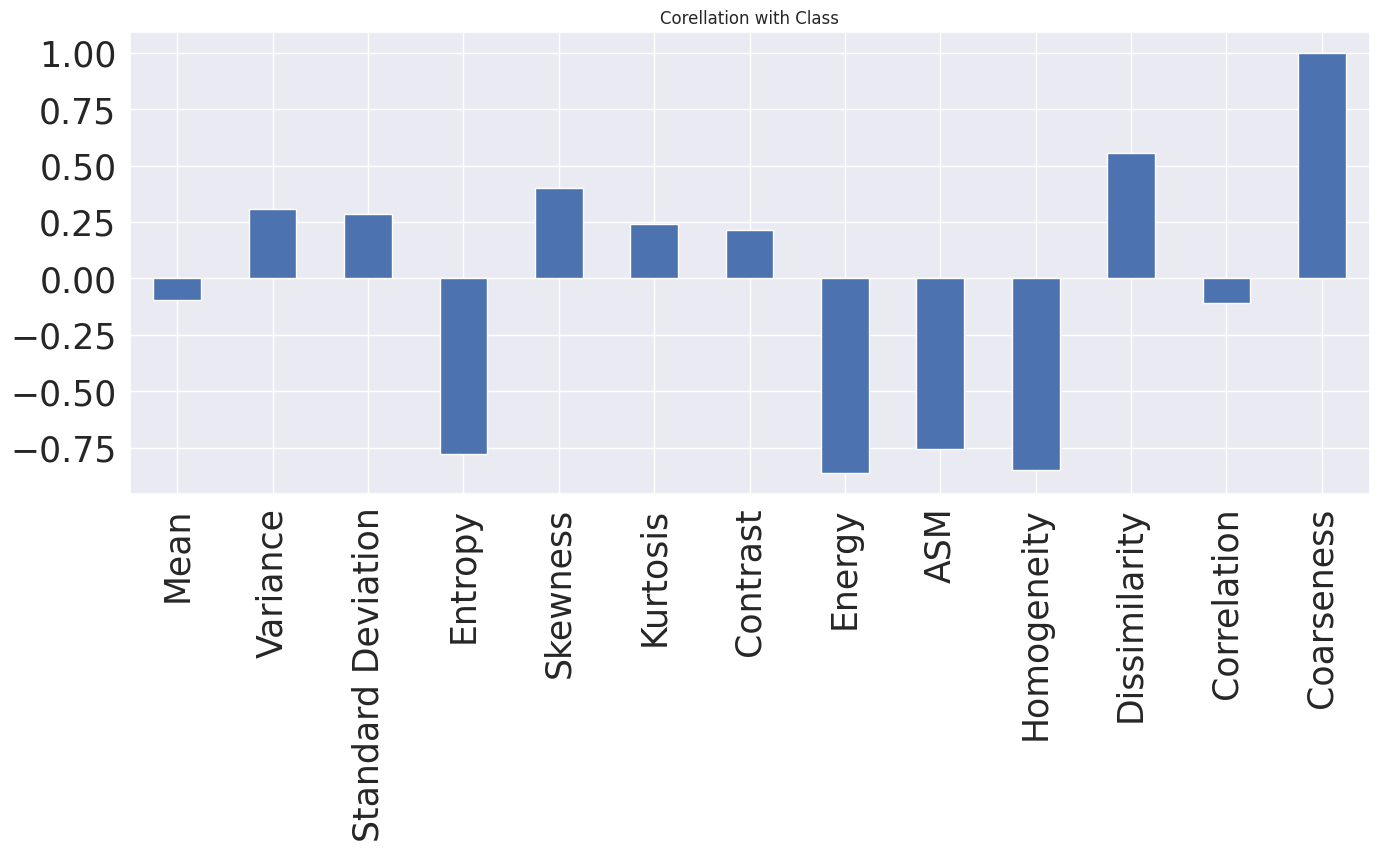

In [ ]:
#Hitung dan tampilkan korelasi antara tiap fitur dengan variabel target Class
plt.figure()
print(X.corrwith(Y))

X.corrwith(Y).plot.bar(figsize=(16,6), title="Corellation with Class", fontsize=25, rot=90, grid=True)

# **15. menampilakn sebarang presentase fitur dengan variabel target, kemudian hasilnya dibuat dengan pie card (diagram lingkaran)**

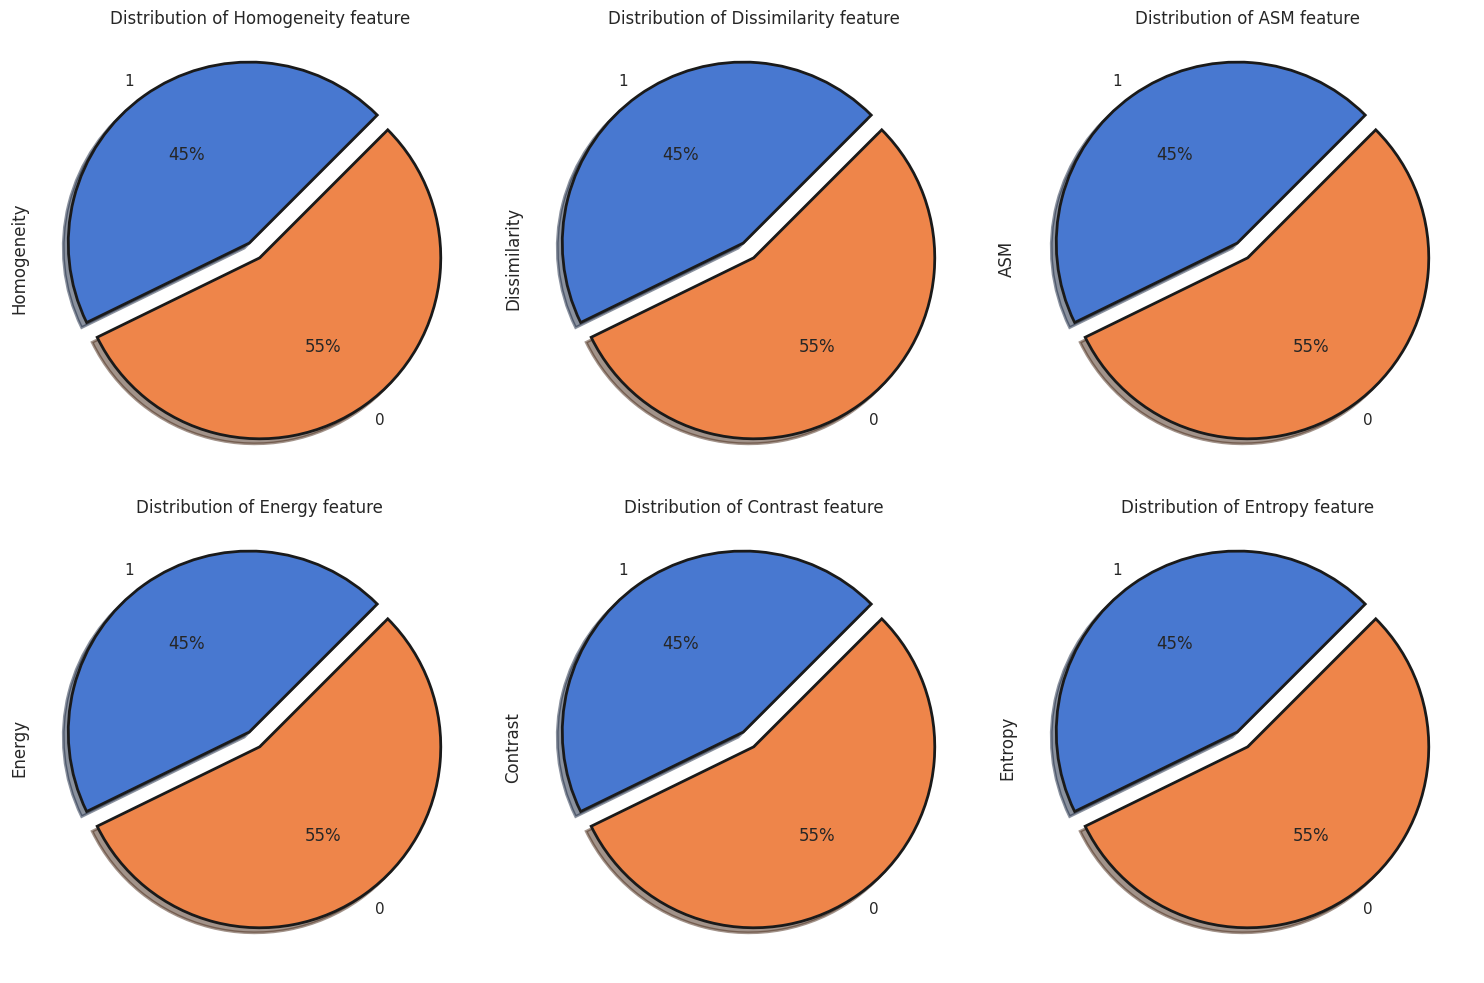

In [ ]:
#Tampilkan sebaran prosentase atas keenam fitur terhadap variabel target Class
def plot_dist_feature_pie(data, feature):
    a0 = len(data[feature][(data["Class"]==0)])
    a1 = len(data[feature][(data["Class"]==1)])
    np_data = np.array([a1, a0])
    np_series = pd.Series(np_data)
    np_series.plot.pie(autopct="%1.0f%%", colors=sns.color_palette("muted", 7),
                       startangle=45, labels=["1", "0"], wedgeprops={"linewidth":2, "edgecolor":"k"},
                       explode=[.1,0], shadow=True)
    plt.ylabel(feature)
    plt.title('Distribution of '+ feature + ' feature')
    plt.grid('On')

plt.figure(figsize=(15, 10))  # Membuat satu figure untuk semua subplot
plt.subplot(231)
plot_dist_feature_pie(df, "Homogeneity")
plt.subplot(232)
plot_dist_feature_pie(df, "Dissimilarity")
plt.subplot(233)
plot_dist_feature_pie(df, "ASM")
plt.subplot(234)
plot_dist_feature_pie(df, "Energy")
plt.subplot(235)
plot_dist_feature_pie(df, "Contrast")
plt.subplot(236)
plot_dist_feature_pie(df, "Entropy")

plt.tight_layout()  # Menyesuaikan tata letak subplot agar tidak tumpang tindih
plt.show()

# **16. membagi dataset menjadi pelatih dan penguji**

In [ ]:
#Bagi dataset menjadi data pelatihan dan data pengujian
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=9)

print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X shape: (3762, 13)
Y shape: (3762,)
X train shape:  (3009, 13)
Y train shape:  (3009,)
X test shape:  (753, 13)
Y test shape:  (753,)


# **17. mendefinisikan metode plot_real_pred_val untuk memvisualisasikan perbandingan dengan menampilkan grafik scatter.**

[1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



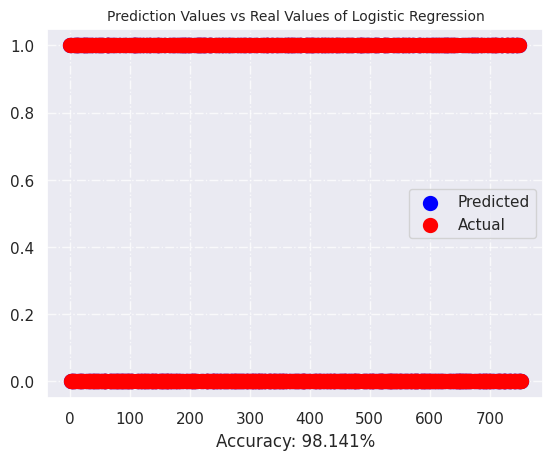

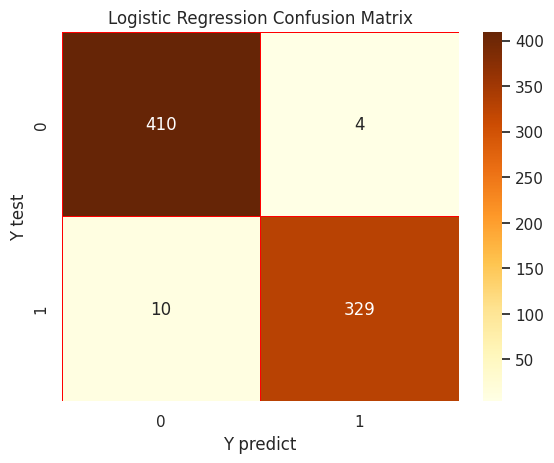

0.9814077025232404
Average precision-recall score: 0.97


In [ ]:
# Definisikan metode plot_real_pred_val() untuk menampilkan grafik scatter atas keluaran (nilai terprediksi)
def plot_real_pred_val(y_test, ypred, model):
    plt.figure()
    acc = accuracy_score(y_test, ypred)
    plt.scatter(range(len(ypred)), ypred, color="blue", lw=5, label="Predicted")
    plt.scatter(range(len(y_test)), y_test, color="red", lw=5, label="Actual")
    plt.title("Prediction Values vs Real Values of " + model, fontsize=10)
    plt.xlabel("Accuracy: " + str(round((acc * 100), 3)) + "%")
    plt.legend()
    plt.grid(True, alpha=0.75, lw=1, ls='-.')
    plt.show()

# Definisikan metode plot_cm() untuk menampilkan confusion matrix
def plot_cm(y_test, ypred, model):
    cm = confusion_matrix(y_test, ypred)
    sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', cmap="YlOrBr")
    plt.title(model + ' Confusion Matrix')
    plt.xlabel('Y predict')
    plt.ylabel('Y test')
    plt.show()
    return cm

# Membangun dan melatih model Logistic Regression
logreg = LogisticRegression(C=10)
logreg.fit(X_train, Y_train)

pred_lr = logreg.predict(X_test)
print(pred_lr[1:100])

plot_real_pred_val(Y_test, pred_lr, "Logistic Regression")
logreg_cm = plot_cm(Y_test, pred_lr, "Logistic Regression")

score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

average_precision_lr = average_precision_score(Y_test, pred_lr)
print('Average precision-recall score: {0:0.2f}'.format(average_precision_lr))

# **18. menampilkan batasan keputusan**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



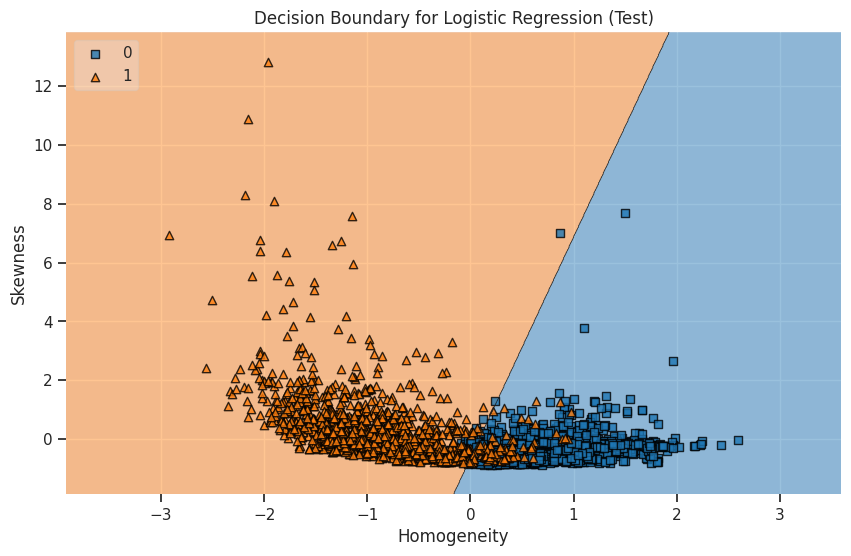

[0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
0.9512843224092117


In [ ]:
# Tampilkan batas keputusan antara 2 fitur dengan model Logistic Regression
feature_boundary = ['Homogeneity', 'Skewness']
X_feature = df[feature_boundary]
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, Y, test_size=0.3, random_state=42)

logreg_feat = LogisticRegression(C=10)
logreg_feat.fit(X_train_feature, y_train_feature)

# Plot decision boundary menggunakan mlxtend.plotting
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_feature.values, y_train_feature.values, clf=logreg_feat, legend=2)
plt.title("Decision Boundary for Logistic Regression (Test)")
plt.xlabel("Homogeneity")
plt.ylabel("Skewness")
plt.show()

pred_lr_feat = logreg_feat.predict(X_test_feature)
print(pred_lr_feat[1:100])

score_logreg_feat = logreg_feat.score(X_test_feature, y_test_feature)
print(score_logreg_feat)

# **19. membangun dan melatih model svm**

[1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1]


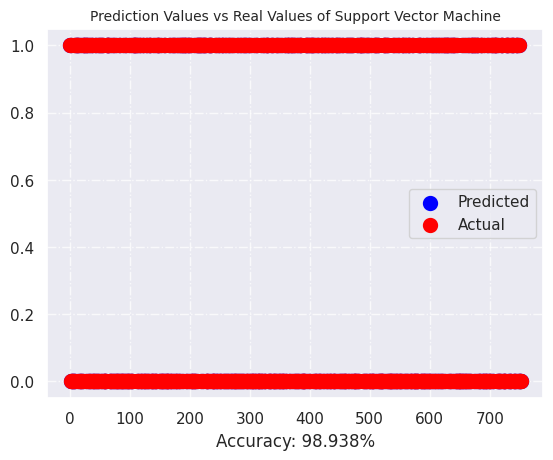

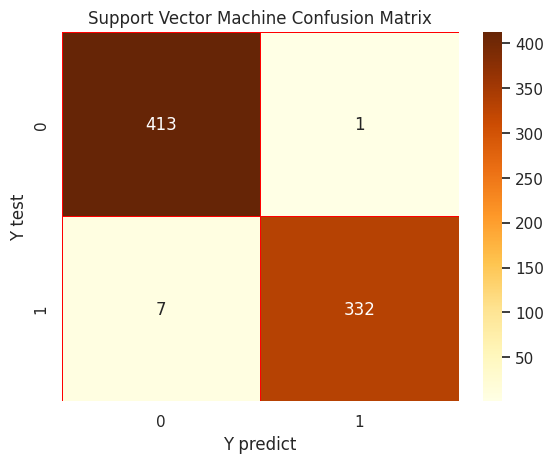

0.9893758300132802
Average precision-recall score:0.99


In [ ]:
#Membangun dan melatih model SVM
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10, kernel='rbf', random_state=9, probability=True), n_jobs=1))

svmcla.fit(X_train, Y_train)

pred_svm = svmcla.predict(X_test)
print(pred_svm[1:100])

plot_real_pred_val(Y_test, pred_svm, "Support Vector Machine")

svmcla_cm = plot_cm(Y_test, pred_svm, "Support Vector Machine")

score_svmcla = svmcla.score(X_test, Y_test)
print(score_svmcla)

average_precision_score_svm = average_precision_score(Y_test, pred_svm)
print('Average precision-recall score:{0:0.2f}'.format(average_precision_score_svm))

# **20. menampilkan batasan keputusan antar 2 fitur dengna model**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but BaggingClassifier was fitted with feature names



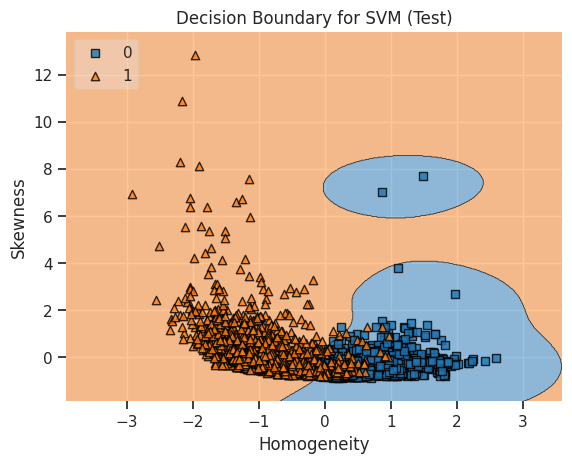

[0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
0.9548272807794509


In [ ]:
# Tampilkan batas keputusan antara 2 fitur dengan model SVM dan hitung dan tampilkan nilai terprediksi
#dan skor pengujian atas 2 fitur tsb
# Definisikan nama fitur
feature_boundary = ['Homogeneity', 'Skewness']
# Ambil subset DataFrame dengan fitur yang dipilih
X_feature = df[feature_boundary]

# Inisialisasi dan latih model SVC dalam BaggingClassifier
svmcla_feat = OneVsRestClassifier(BaggingClassifier(SVC(C=10, kernel='rbf', random_state=9, probability=True), n_jobs=-1))
svmcla_feat.fit(X_train_feature, y_train_feature)

# Plot decision boundary menggunakan mlxtend.plotting
plot_decision_regions(X_train_feature.values, y_train_feature.values, clf=svmcla_feat, legend=2)
plt.title("Decision Boundary for SVM (Test)")
plt.xlabel("Homogeneity")
plt.ylabel("Skewness")
plt.show()

# Prediksi pada data uji
pred_svm_feat = svmcla_feat.predict(X_test_feature)
print(pred_svm_feat[1:100])

# Hitung akurasi model pada data uji
score_svm_feat = svmcla_feat.score(X_test_feature, y_test_feature)
print(score_svm_feat)

# **21. membangun model nayes bayes dan menampilkan dengan grafik**

[1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1]


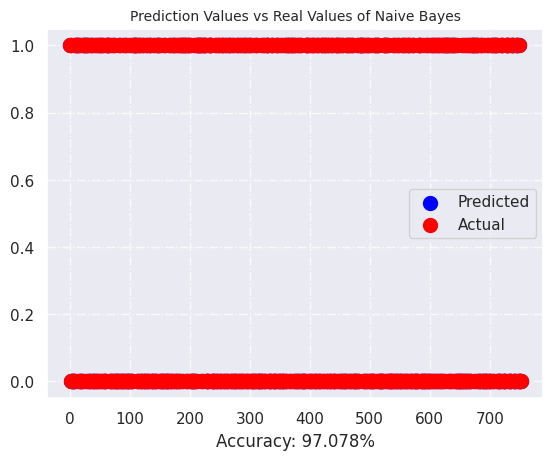

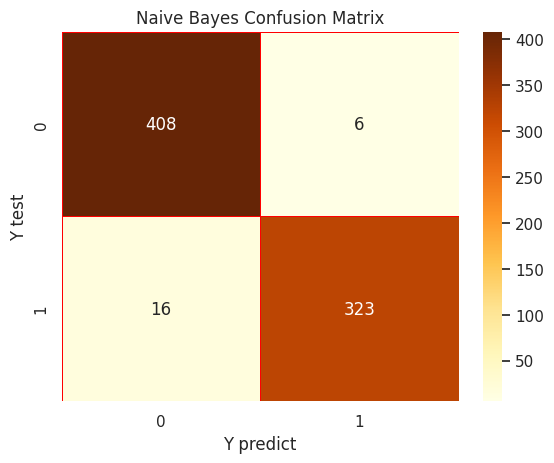

0.9707835325365206
Average precision-recall score:0.96


In [ ]:
#Membangun dan melatih model Naive Bayes
#Menampilkan grafik nilai sebenarnya vs nilai terprediksi
#Menampilkan cofussion matrix dari Naive Bayes
#Menghitung dan menampilkan nilai-nilai terprediksi dan skor pengujian atas semua fitur pada dataset

nbcla = GaussianNB()

nbcla.fit(X_train, Y_train)

pred_nb = nbcla.predict(X_test)
print(pred_nb[1:100])

plot_real_pred_val (Y_test, pred_nb, "Naive Bayes")

nbcla_cm = plot_cm(Y_test, pred_nb, "Naive Bayes")

score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

average_precision_score_nb = average_precision_score(Y_test, pred_nb)
print('Average precision-recall score:{0:0.2f}'.format(average_precision_score_nb))